In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

%matplotlib inline

# Toy Dataset 

In [31]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Define Linear Regression Model
Usually, models are defined in this skeleton

In [32]:
class LinearRegression(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(D_in, D_out)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

# Create Model

In [33]:
input_size = x_train.shape[1]
out_size = y_train.shape[1]
model = LinearRegression(input_size, out_size)

# Define Loss and Optimizer

In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
optimizer.zero_grad()

In [35]:
num_epochs = 60

In [38]:
inputs = Variable(torch.from_numpy(x_train))
targets = Variable(torch.from_numpy(y_train))

for epoch in range(num_epochs):
        optimizer.zero_grad()
        pred = model(inputs)
        loss = criterion(pred, targets)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 5 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))
        

Epoch [5/60], Loss: 6.3799
Epoch [10/60], Loss: 2.6890
Epoch [15/60], Loss: 1.1937
Epoch [20/60], Loss: 0.5879
Epoch [25/60], Loss: 0.3425
Epoch [30/60], Loss: 0.2431
Epoch [35/60], Loss: 0.2028
Epoch [40/60], Loss: 0.1864
Epoch [45/60], Loss: 0.1798
Epoch [50/60], Loss: 0.1771
Epoch [55/60], Loss: 0.1760
Epoch [60/60], Loss: 0.1756


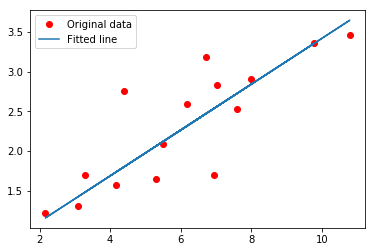

In [39]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()